Regression polynomiale
======================

On recherche une fonction polynomiale permettant d'approcher la série observée :  
$ y = a_n\cdot x^n + \dots + a_i\cdot x^i + \dots + a_1\cdot x + b $  


Données d'apprentissage
-----------------------

In [1]:
import numpy as np
import math
import random
import matplotlib
import matplotlib.pyplot as plt

import deepmods.notebook as ooo

ooo.init(id='03', save_figs=True)


Deepmod by pjluc 2019
  Version          : 0.4
  Run time         : Monday 16 September 2019, 10:44:49
  Run directory    : ./run/lab-03
  Save figs        : True
  Matplotlib style : deepmods/talk.mplstyle
  Hide warning     : True

TensorFlow version :  1.14.0
Keras version      :  2.2.4-tf

Init done.


Nombre de points : 100  a=[-0.22943374 -1.0209786  -0.67126947 -1.64148742 -1.68444233  1.87359402
  1.68766329] deg=7 bruit=2000

Données d'aprentissage brute :
(100 points visibles sur 100)


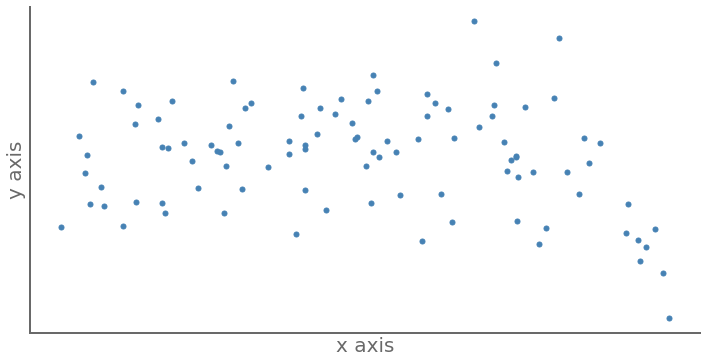

X        :      mean=     -0.1226  std=     +2.6400    min=     -4.8178    max=     +4.7635
Y        :      mean=   -464.3854  std=  +2304.5018    min=  -7481.1197    max=  +5424.4727

Données d'aprentissage normalisées :
(100 points visibles sur 100)


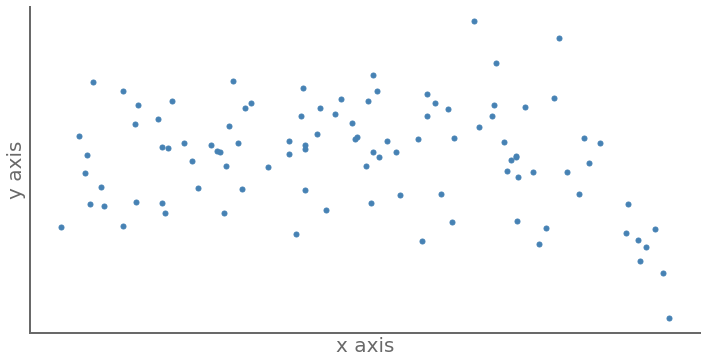

X_norm   :      mean=     +0.0000  std=     +1.0000    min=     -1.7785    max=     +1.8508
Y_norm   :      mean=     -0.0000  std=     +1.0000    min=     -3.0448    max=     +2.5554


In [2]:
# ---- Paramètres du jeu d'apprentissage ----------------

n         = 100     # Nombre d'observations avec y = a.x + b

xob_min   = -5      # x min and max
xob_max   = 5

deg       =  7
a_min     = -2     # a min and max
a_max     =  2

noise     =  2000

# ---- Construction du jeu d'apprentissage ---------------
#      X,Y              : données brutes
#      X_norm,Y_norm    : données normaliseés

X = np.random.uniform(xob_min,xob_max,(n,1))
# N = np.random.uniform(-noise,noise,(n,1))
N = noise * np.random.normal(0,1,(n,1))

a = np.random.uniform(a_min,a_max, (deg,))
fy = np.poly1d( a )

Y = fy(X) + N

# ---- Normalisation des données --------------------------
#
X_norm = (X - X.mean(axis=0)) / X.std(axis=0)
Y_norm = (Y - Y.mean(axis=0)) / Y.std(axis=0)

# ---- Visualisation des données --------------------------

width = 12
height = 6
nb_viz = min(2000,n)

def vector_infos(name,V):
    m=V.mean(axis=0).item()
    s=V.std(axis=0).item()
    print("{:8} :      mean={:+12.4f}  std={:+12.4f}    min={:+12.4f}    max={:+12.4f}".format(name,m,s,V.min(),V.max()))


print("Nombre de points : {}  a={} deg={} bruit={}".format(n,a,deg,noise))

print("\nDonnées d'aprentissage brute :")
print("({} points visibles sur {})".format(nb_viz,n))
plt.figure(figsize=(width, height))
plt.plot(X[:nb_viz], Y[:nb_viz], '.')
plt.tick_params(axis='both', which='both', bottom=False, left=False, labelbottom=False, labelleft=False)
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.show()
vector_infos('X',X)
vector_infos('Y',Y)

print("\nDonnées d'aprentissage normalisées :")
print("({} points visibles sur {})".format(nb_viz,n))
plt.figure(figsize=(width, height))
plt.plot(X_norm[:nb_viz], Y_norm[:nb_viz], '.')
plt.tick_params(axis='both', which='both', bottom=False, left=False, labelbottom=False, labelleft=False)
plt.xlabel('x axis')
plt.ylabel('y axis')
ooo.save_fig('PolyReg-a',svg=False)
plt.show()
vector_infos('X_norm',X_norm)
vector_infos('Y_norm',Y_norm)


Regression polynomiable avec NumPy - Underfitting
----------------------------------

Nombre de degrés : 1 a_hat=[-1.93718494e-01 -2.19309214e-17]


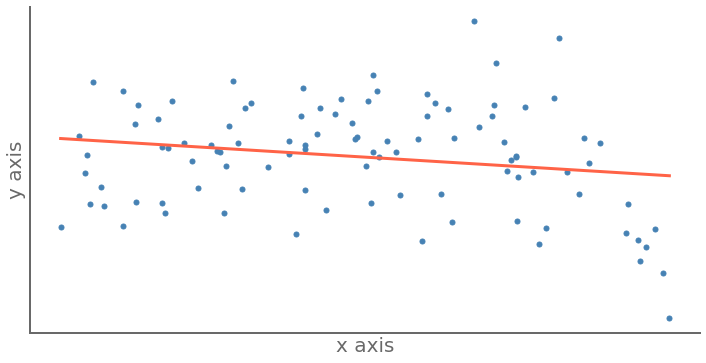

In [3]:
reg_deg=1

a_hat   = np.polyfit(X_norm.reshape(-1,), Y_norm.reshape(-1,), reg_deg)
fy_hat  = np.poly1d( a_hat )
print("Nombre de degrés : {} a_hat={}".format(reg_deg, a_hat))

plt.figure(figsize=(width, height))
plt.plot(X_norm[:nb_viz], Y_norm[:nb_viz], '.')

x_hat = np.linspace(X_norm.min(), X_norm.max(), 100)

plt.plot(x_hat, fy_hat(x_hat))
plt.tick_params(axis='both', which='both', bottom=False, left=False, labelbottom=False, labelleft=False)
plt.xlabel('x axis')
plt.ylabel('y axis')
ooo.save_fig('PolyReg-b',svg=False)
plt.show()


Regression polynomiable avec NumPy - Good fitting
------------------------------------------------

Nombre de degrés : 5 a_hat=[-0.04534686 -0.19531739 -0.04539552  0.13366745  0.14324724  0.25623285]


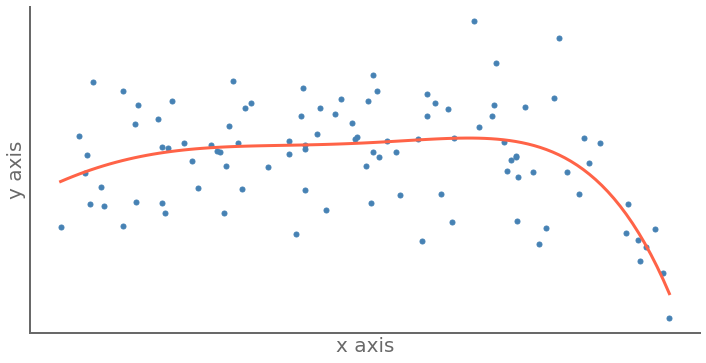

In [4]:
reg_deg=5

a_hat   = np.polyfit(X_norm.reshape(-1,), Y_norm.reshape(-1,), reg_deg)
fy_hat  = np.poly1d( a_hat )
print("Nombre de degrés : {} a_hat={}".format(reg_deg, a_hat))

plt.figure(figsize=(width, height))
plt.plot(X_norm[:nb_viz], Y_norm[:nb_viz], '.')

x_hat = np.linspace(X_norm.min(), X_norm.max(), 100)

plt.plot(x_hat, fy_hat(x_hat))
plt.tick_params(axis='both', which='both', bottom=False, left=False, labelbottom=False, labelleft=False)
plt.xlabel('x axis')
plt.ylabel('y axis')
ooo.save_fig('PolyReg-c',svg=False)
plt.show()


Regression polynomiable avec NumPy - overfitting
------------------------------------------------

Nombre de degrés : 24 a_hat=[-1.41045919e+00  2.77703783e+00  2.51945874e+01 -4.80231158e+01
 -1.97955601e+02  3.60196339e+02  8.99984572e+02 -1.53522269e+03
 -2.61807879e+03  4.09195514e+03  5.07976388e+03 -7.07168311e+03
 -6.62996484e+03  7.94917539e+03  5.70686689e+03 -5.67690230e+03
 -3.06474938e+03  2.44327342e+03  9.12220166e+02 -5.78983732e+02
 -1.13831082e+02  6.57827687e+01  1.21859617e+00 -2.64686707e+00
  4.62733273e-01]


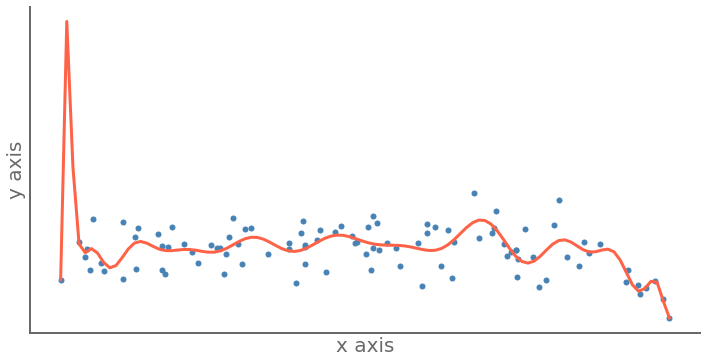

In [5]:
reg_deg=24

a_hat   = np.polyfit(X_norm.reshape(-1,), Y_norm.reshape(-1,), reg_deg)
fy_hat  = np.poly1d( a_hat )
print("Nombre de degrés : {} a_hat={}".format(reg_deg, a_hat))

plt.figure(figsize=(width, height))
plt.plot(X_norm[:nb_viz], Y_norm[:nb_viz], '.')

x_hat = np.linspace(X_norm.min(), X_norm.max(), 100)

plt.plot(x_hat, fy_hat(x_hat))
plt.tick_params(axis='both', which='both', bottom=False, left=False, labelbottom=False, labelleft=False)
plt.xlabel('x axis')
plt.ylabel('y axis')
ooo.save_fig('PolyReg-d',svg=False)
plt.show()
